Before you turn this problem set in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Note that in code sections, you must replace `stop("Not Implemented")` with your code. Otherwise, you will have points automatically deducted in the grading process.

**Please do not rename this file.**

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER/EXPLANATION HERE". In addition, please do not include your name on this assignment to ensure anonymity for the peer reviews.

---

#### Note: Please post any questions that you have to the lesson 7 discussion board. This includes any questions about notation.

# Problem 1

### Weighted Averages

This will require the `gapminder` data set, which was used in an earlier assignment (the `gapminder` package should, therefore, be installed on your computer). For more information about the data, load the `gapminder` package with `library(gapminder)`, and find the data set description with `?gapminder`.

If one wants to examine some worldwide trend, it is often important that the data be **weighted** in order to obtain numbers that make sense. For example, if one wants to know the global human life expectancy, it makes sense that the nation-wide life expectancy in India or China should have more weight than that in, say, Luxembourg. In such a case, it is logical to weigh each country's contribution to the worldwide life expectancy by its population relative to the population of the planet at a certain time. For country $i$ at time $t$, the population weight of that country can be calculated as 

$$\text{weight}_{i,t} = \frac{\text{pop}_{i,t}}{\sum_{i = 1}^n \text{pop}_{i,t}}$$

If you're a little unsure about the notation here, $\sum_{i = 1}^n \text{pop}_{i,t}$ reads as "the sum of all of the countries' populations at time $t$.

Begin by correctly finding a weight for all of the countries using any method. As a hint, the `aggregate`, `merge`, and `transform` functions may be useful. Make a data frame called `pop_weight` that includes, at a minimum, all of the variables in the `gapminder` data frame and a variable called `pop_weight` that contains each country's population weight for all 12 different years that there are measurements. The `pop_weight` data frame should have 1704 rows.

In [232]:
library("gapminder")
data("gapminder")

df_g <- transform(gapminder, pop = as.numeric(pop))  # typecast pop as double, prevent integer overflow  
df_g_yrsum <- aggregate(pop ~ year, data=df_g, sum)  # aggregate on year, sum pop
colnames(df_g_yrsum)[2] <- "popYearSum"  # reset name of population total
pop_weight <- merge(df_g, df_g_yrsum, 'year')  # merge on year to incorporate popYearSum
pop_weight$pop_weight <- pop_weight$pop / pop_weight$popYearSum  # calculate weighted average of pop

In [233]:
head(pop_weight)

year,country,continent,lifeExp,pop,gdpPercap,popYearSum,pop_weight
1952,Afghanistan,Asia,28.801,8425333,779.4453,2406957150,3.500408e-03
1952,New Zealand,Oceania,69.390,1994794,10556.5757,2406957150,8.287617e-04
1952,Mauritius,Africa,50.986,516556,1967.9557,2406957150,2.146096e-04
1952,Kuwait,Asia,55.565,160000,108382.3529,2406957150,6.647397e-05
1952,Iraq,Asia,45.320,5441766,4129.7661,2406957150,2.260849e-03
1952,Taiwan,Asia,58.500,8550362,1206.9479,2406957150,3.552353e-03


Check to see that the calculation was done correctly.

In [234]:
stopifnot(c(names(gapminder),"pop_weight") %in% names(pop_weight),
         round(summary(round(pop_weight$pop_weight,digits = 5)),digits = 5) == structure(c(2e-05, 0.00067, 0.00167, 0.00704, 0.00418, 0.24099
), .Names = c("Min.", "1st Qu.", "Median", "Mean", "3rd Qu.", 
"Max."), class = c("summaryDefault", "table")))

Now find the weighted average life expectancy for each country for each of the years in the `gapminder` data set. The `aggregate` and `transform` functions may be helpful here. Create a data frame called `weighted_life` which contains two variables, `year` and `weighted_lifeExp`. The weighted average can be found as

$$\text{weighted average}_t = \sum_{i = 1}^n \text{weight}_{i,t} \times \text{lifeExp}_{i,t}$$

Similarly, create another data frame called `unweighted_life` which contains the variables `year` and `unweighted_lifeExp`. Each observation in these data sets should correspond to the global average life expectancy in a given year. Both data frames should have 12 observations. Check to make sure the averages were found correctly. 

In [235]:
# weighted mean life expentancy
pop_weight$weighted_lifeExp <- pop_weight$pop_weight * pop_weight$lifeExp
weighted_life <- aggregate(weighted_lifeExp ~ year, data=pop_weight, sum)

# plain ol mean life expentancy
unweighted_life <- aggregate(lifeExp ~ year, data=pop_weight, mean)
colnames(unweighted_life)[2] <- 'unweighted_lifeExp'

Now check to make sure you calculated the averages correctly.

In [236]:
stopifnot(round(summary(round(weighted_life$weighted_lifeExp,digits=5)),digits = 5) == structure(c(48.94424, 55.81933, 62.05951, 60.63986, 65.94676, 
68.91909), .Names = c("Min.", "1st Qu.", "Median", "Mean", "3rd Qu.", 
"Max."), class = c("summaryDefault", "table")),
         round(summary(round(unweighted_life$unweighted_lifeExp,digits=5)),digits = 5) == structure(c(49.05762, 55.16103, 60.55168, 59.47444, 64.37392, 
67.00742), .Names = c("Min.", "1st Qu.", "Median", "Mean", "3rd Qu.", 
"Max."), class = c("summaryDefault", "table")))

Next, create a plot that compares the two averages over the years. Remember to include all of the necessary information on the graph, as discussed in lesson 6. Your plot must be able to run on any computer without any extra packages added (other than the `gapminder` package for the data). 

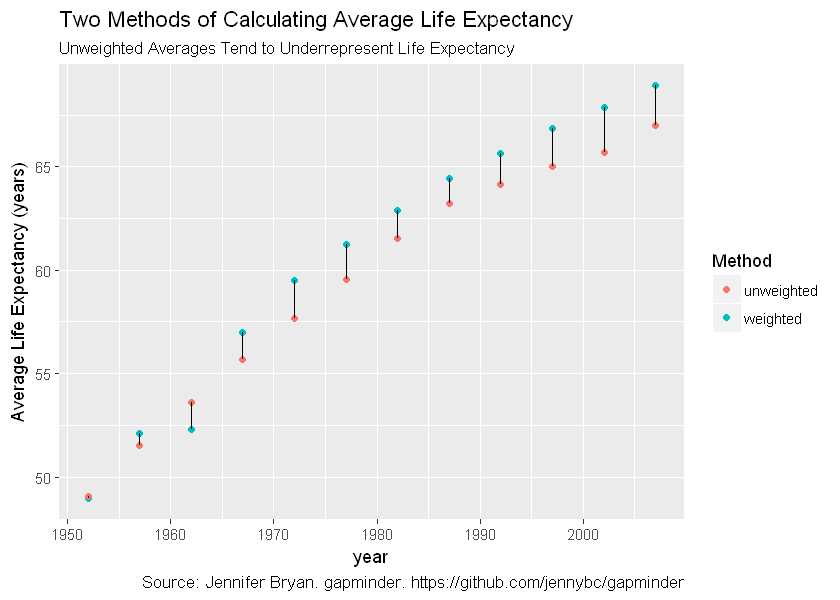

In [237]:
library(ggplot2)
weighted_life$Method <- 'weighted'
colnames(weighted_life)[2] <- 'lifeExp'
unweighted_life$Method <- 'unweighted'
colnames(unweighted_life)[2] <- 'lifeExp'

options(repr.plot.width = 7, repr.plot.height = 5)

ggplot(rbind(weighted_life, unweighted_life), aes(x=year, y=lifeExp)) +
        geom_point(aes(color = Method)) +
        geom_line(aes(group = year)) +
        labs(title = "Two Methods of Calculating Average Life Expectancy",
             subtitle = "Unweighted Averages Tend to Underrepresent Life Expectancy\n",
             y = "Average Life Expectancy (years)\n",
           caption = "Source: Jennifer Bryan. gapminder. https://github.com/jennybc/gapminder") 

Note that there is an observable difference in the two averaging methods. Why does the weighting have the effect that it does? This is a rhetorical question, but it's very important to think about this type of comparison in statistical applications! 

---

# Problem 2

Continuing the analysis of the `gapminder` data from problem 1, find the population-weighted average life expectancy for each continent. First, find the continent-level weights. That is, for country $i$ on continent $j$ at time $t$, find

$$ \text{weight}_{i,t} = \frac{\text{pop}_{i,t}}{\sum_{i \text{ in } j} \text{pop}_{i,t}} $$

Note that this can be done in a couple of different ways, though the easiest option without loading extra packages might be to use `aggregate`, `merge`, and `transform` again. Create a single data frame called `continent_weights` that includes all of the variables in the `gapminder` data frame, plus the variable `continent_weight`.

In [238]:
library("gapminder")
data("gapminder")


df_g <- transform(gapminder, pop = as.numeric(pop))  # typecast pop as double, prevent integer overflow  
df_g_yrsum <- aggregate(pop ~ year + continent, data=df_g, sum)  # aggregate on year, sum pop
colnames(df_g_yrsum)[3] <- "popYearContiSum"  # reset name of population total
continent_weights <- merge(df_g, df_g_yrsum)  # merge on year to incorporate popYearSum
continent_weights$continent_weight <- continent_weights$pop / continent_weights$popYearContiSum  # calculate weighted average of pop

Now check to make sure that the weights were calculated correctly.

In [239]:
stopifnot(round(summary(round(continent_weights$continent_weight,digits=5)),digits = 5) == structure(c(9e-05, 0.00393, 0.01054, 0.03521, 0.02521, 0.83567
), .Names = c("Min.", "1st Qu.", "Median", "Mean", "3rd Qu.", 
"Max."), class = c("summaryDefault", "table")))

Calculate the population-weighted averages for each continent. Create a data frame named `continent_weighted` with three variables: `year`, `continent`, and `avg_life` where each observation corresponds to the population-weighted average life expectancy for a year and continent. This data frame should have 60 observations.

In [240]:
continent_weights$avg_life <- continent_weights$lifeExp * continent_weights$continent_weight
continent_weighted <- aggregate(avg_life ~ year + continent, continent_weights, sum)

Now check that the averages were calculated correctly.

In [241]:
stopifnot(round(summary(round(continent_weighted$avg_life,digits = 5)),digits = 5) == structure(c(38.79973, 54.39396, 67.87161, 64.33739, 72.71974, 
81.06215), .Names = c("Min.", "1st Qu.", "Median", "Mean", "3rd Qu.", 
"Max."), class = c("summaryDefault", "table")))

Finally, make a visualization that shows the change in life expectancy for each continent over time. Make sure the visualization allows the viewer to compare the trends between continents. In addition, include the global weighted average that you calculated in problem 1. Again, be sure to follow the best practices when making a plot, as outlined in lesson 6.

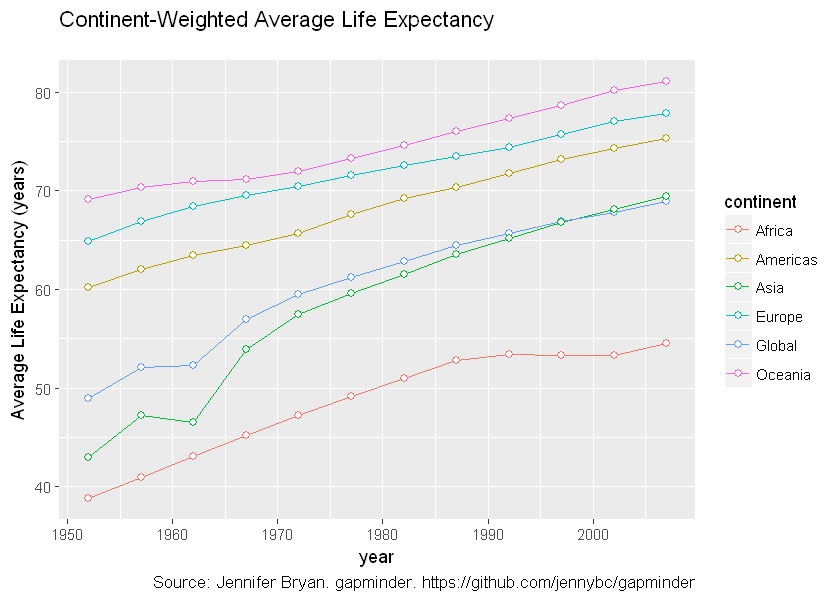

In [259]:
colnames(weighted_life) <- c('year', 'avg_life','continent')
weighted_life$continent <- 'Global'
ggplot(data=rbind(weighted_life, continent_weighted), aes(x=year, y=avg_life, color = continent)) +
    geom_line() +
    geom_point( size=2, shape=21, fill="white") +
    labs(title = "Continent-Weighted Average Life Expectancy\n",
         y = "Average Life Expectancy (years)\n",
        caption = "Source: Jennifer Bryan. gapminder. https://github.com/jennybc/gapminder") 

---

# Problem 3

Using only the data from the year 2007 in the `gapminder` data frame, create a bar plot that includes the five countries from each continent with the highest life expectancies. This will end up including 22 countries, as the Oceania continent only has Australia and New Zealand. Make sure the visualization includes visual cues that allow the viewer to easily identify the continent of the country. Be sure to include all of the elements of a plot discussed in lesson 6. This will take a few steps to complete correctly. Depending on personal preference, Google may be necessary to discover little tweaks to be made. The lesson 7 discussion board is also available.

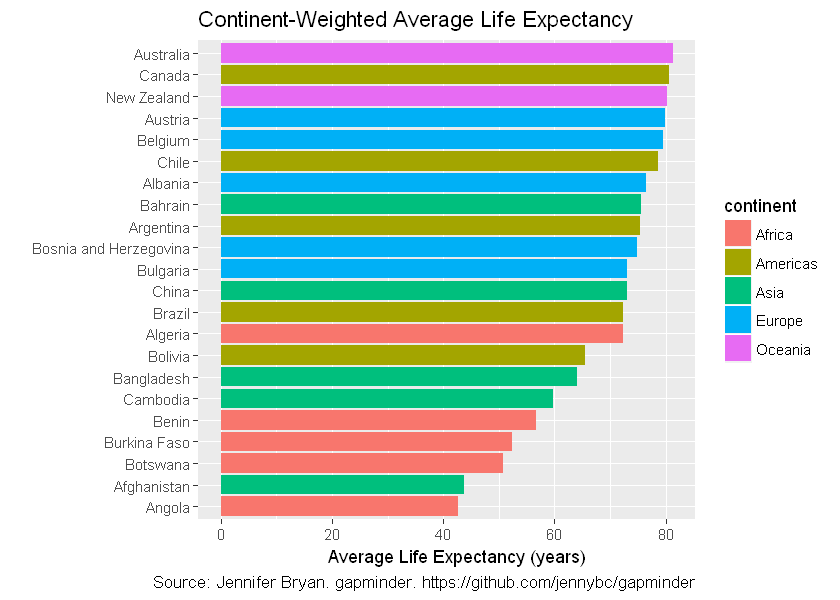

In [260]:
require(data.table)
df <- data.table(gapminder[gapminder$year == 2007,], key="continent")
df_2007 <- df[, head(.SD, 5), by=continent]
#  df_2007[order(df_2007&lifeExp),]
ggplot(data=df_2007, aes(x=reorder(country, lifeExp), y=lifeExp, fill=continent)) + 
    geom_bar(stat="identity") +
    coord_flip() +
    labs(title = "Continent-Weighted Average Life Expectancy",
         y = "    Average Life Expectancy (years)",
         x = "",
        caption = "Source: Jennifer Bryan. gapminder. https://github.com/jennybc/gapminder")

---

# Problem 4

Using the `NBAStandings1e` and `NBAStandings2016` datasets in the `Lock5Data` package, create a slopegraph to show how the win percentage (`WinPct`) for each team changed between the 2010-2011 and 2015-2016 seasons. Remember to clearly label each team for both seasons, and offset the labels from each other so that all of the team names are readable. In addition, some teams changed names and cities over the five year span of the data set. Account for this by removing the old team name from the dataset for the 2010-2011 season. Once again, all plot elements covered in lesson 6 should be included.

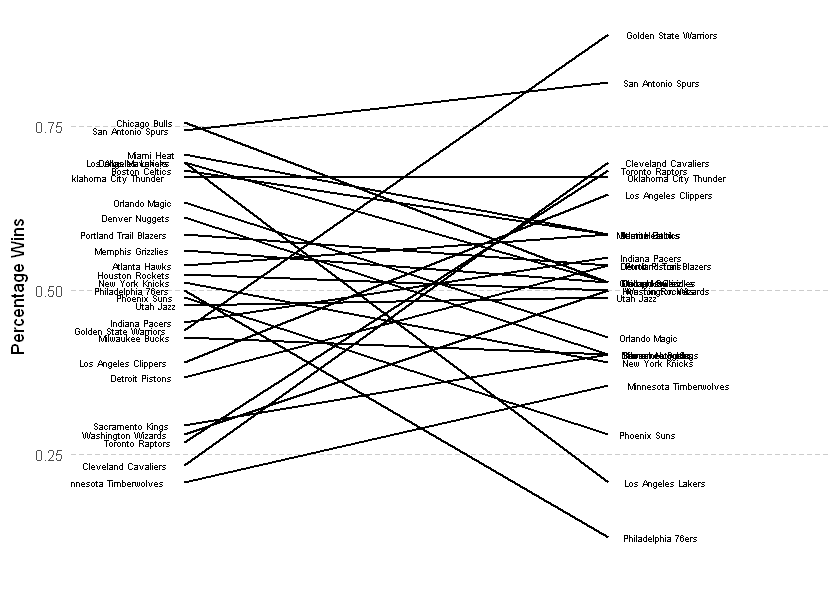

In [399]:
library(tidyverse)
library(Lock5Data)

data("NBAStandings1e")
data("NBAStandings2016")
colnames(NBAStandings1e)[4] <- "2010-11"    # 2010-2011
colnames(NBAStandings2016)[4] <- "2015-16"  # 2015-2016
nba_df <- merge(NBAStandings1e[,c('Team','2010-11')], NBAStandings2016[,c('Team','2015-16')])


dat <- gather(nba_df, Season, value, -Team) 

dat_lab <- dat %>% group_by(Season, group=round(value/0.02)*0.02) %>% 
  summarise(Team = paste(Team, collapse=", "),
            value = mean(value))

ggplot(dat, aes(Season, value, group=Team)) +
    geom_line() +
    theme_minimal() + theme(panel.grid.minor=element_blank()) +
    theme(panel.grid.major = element_line(linetype = "dashed",color = "grey80")) +
    theme(panel.grid.major.x = element_blank()) +
    labs(y="Percentage Wins") +
    scale_y_continuous(limits=c(0,1), labels=percent) +
    geom_text(data=subset(dat_lab, Season=="2010-11"), aes(label=Team, x=0.98), hjust=1, size=2.2) +
    geom_text(data=subset(dat_lab, Season=="2015-16"), aes(label=Team, x=2.02), hjust=0, size=2.2)

In [274]:
# FROM LECTURE 7
install(quartz)
require(quartz)
quartz(height=7, width=5) 
par(mar=c(4,6,1,6)+0.1) 
n = dim(nba_df)[1] 
ord1 = order(nba_df[,1], decreasing=T) 
ord2 = order(nba_df[,2], decreasing=T) 
plot(seq(1,n), seq(1,n), xlim=c(1,2), ylim=c(0,1), xlab="", ylab="", type="n", axes=F) 
abline(h=seq(0,1,by=0.10), col="grey", lty=2) 
for(i in ord1){
    lines(seq(1,2), nba_df[i,1:4], lwd=2) 
} 
axis(1, at=seq(1,2), labels=c("5 year", "10 year", "15 year", "20 year"), cex.axis=0.6)
axis(2, at=seq(0,1,by=0.10), line=2, las=2, cex.axis=0.6) 
axis(4, at=seq(0,1,by=0.10), line=2, las=2, cex.axis=0.6) 
offsetleft = c(0, 0.5, -0.5, 0, 0.8, 0.4, -0.7, -0.4, 0, 0, 0.9, 0.05, -1.1, 0.25, 0, -0.1, 0, 0, 0, 0, 0.4,-0.4, 0 ,0) 
offsetright = c(0, 0, 0, 0, 0, 0.7, -0.1, 0, 0 , 0, 0.5, -0.5, -0.5, 0, 0.2, -0.2, 0.6, -0.6, 0, 0.7, 0.1, -0.4, -1.2, -0.8) 
mtext(side=2, line=0, at=nba_df[ord1,1]+offsetleft, text=rownames(nba_df)[ord1], las=2, cex=0.5) 
mtext(side=4, line=0, at=nba_df[ord2,2]+offsetright, text=rownames(nba_df)[ord4], las=2, cex=0.5) 
 

ERROR: Error in install(quartz): could not find function "install"


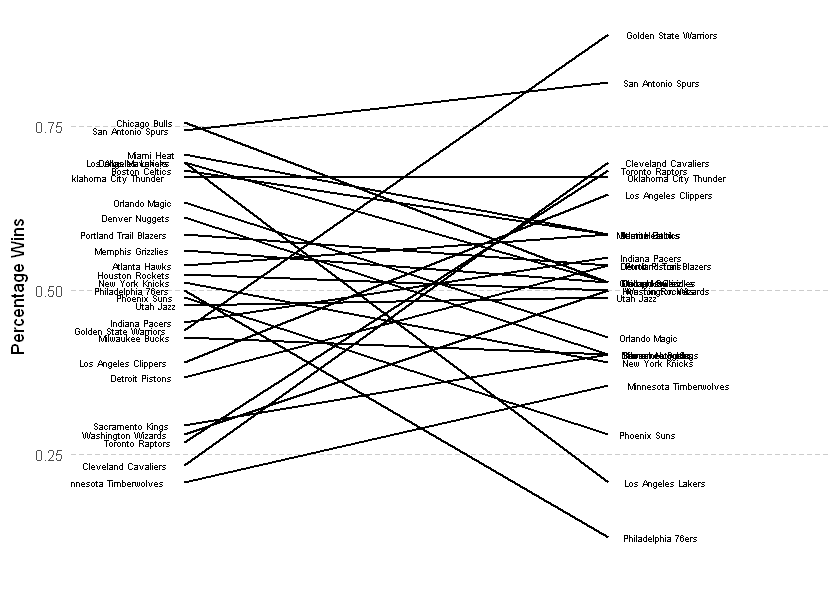

In [398]:
library(ggplot2)
library(scales)
install.packages("Lock5Data", repos = "http://cran.us.r-project.org")  # you might need this
library(Lock5Data)
data("NBAStandings1e")
data("NBAStandings2016")


colnames(NBAStandings1e)[4] <- "year1"    # 2010-2011
colnames(NBAStandings2016)[4] <- "year2"  # 2015-2016
nba_df <- merge(NBAStandings1e[,c('Team','year1')], NBAStandings2016[,c('Team','year2')])
scale <- dim(nba_df)[1] 

a<-nba_df
p<-ggplot(nba_df) + geom_segment(aes(x=0,xend=scale,y=year1,yend=year2),size=.75)

# clear junk
p<-p + theme(panel.background = element_blank())
p<-p + theme(panel.grid=element_blank())
p<-p + theme(axis.ticks=element_blank())
# p<-p + theme(axis.text=element_blank())
p<-p + theme(panel.border=element_blank())
# p<-p + theme(panel.grid.major = element_line(linetype = "dashed", fill = NA))
p<-p + theme(panel.grid.major = element_line(linetype = "dashed",color = "grey80"))
p<-p + theme(panel.grid.major.x = element_blank())
p<-p + theme(axis.text.x = element_blank())


# annotate
p<-p + xlab("") + ylab("Percentage Wins")
p<-p + xlim((-5),(scale+12))
p<-p + geom_text(label="2010-2011 Season", x=0,     y=(1.1*(max(a$year2,a$year1))),hjust= 1.2,size=3)
p<-p + geom_text(label="2015-2016 Season", x=months,y=(1.1*(max(a$year2,a$year1))),hjust=-0.1,size=3)
p<-p + geom_text(label=nba_df$Team, y=nba_df$year2, x=rep.int(scale,dim(a)[1]),hjust=-0.2,size=2)
p<-p + geom_text(label=nba_df$Team, y=nba_df$year1, x=rep.int( 0,dim(a)[1]),hjust=1.2,size=2)
p